# Figure2(Stackedbar) for bertopic

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
import lib.stats.stats as st
from lib.distribution_collector import (collect_topic_distributions,
                                get_top_and_bottom_topics,)

from utils.statistics import *

from constants import CONSTANTS


import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt


In [3]:
data_dir = f'../../visualization/{CONSTANTS.bert_monthly_data_dir[3:]}'
date_range = 'Weekly'
model = 'BERT'


In [4]:
data_dir = f'../../visualization/{CONSTANTS.bert_monthly_data_dir_3[3:]}'
lst = os.listdir(data_dir)
df = pd.DataFrame()
# 디렉토리 내의 파일을 for 문으로 반복
for i in lst:
	js = load_json(f'{data_dir}/{i}')
	tmp = pd.DataFrame(js)
	df = pd.concat([df, tmp], axis = 0)

In [5]:
df = df[['id', 'creationdate', 'Topic']].copy()

In [6]:
df['creationdate'] = pd.to_datetime(df['creationdate'], format="mixed")
df['cdate'] = pd.to_datetime(df['creationdate'], format="%Y-%m-%d").dt.date
df['cdate'] = pd.to_datetime(df['cdate'], format="%Y-%m-%d")


In [7]:
top10list = list(df[(df['cdate']>='2021-11-30')&(df['cdate']<'2022-11-30')].groupby('Topic').count()['id'].reset_index().sort_values(by = 'id', ascending=False)['Topic'][:10])
bot10list = list(df[(df['cdate']>='2021-11-30')&(df['cdate']<'2022-11-30')].groupby('Topic').count()['id'].reset_index().sort_values(by = 'id', ascending=False)['Topic'][-10:])

In [8]:
std_date = datetime.datetime(2022, 11, 30)

In [9]:
df_bf1 = df[(df['cdate']>=datetime.datetime(2021, 11, 30))&(df['cdate']<datetime.datetime(2023, 12, 2))]

In [10]:
print(df_bf1['cdate'].min())
print(df_bf1['cdate'].max())

2021-11-30 00:00:00
2023-11-30 00:00:00


In [11]:
df_bf1

,id,creationdate,Topic,cdate
0,73656349,2022-09-09 01:04:56.530,17,2022-09-09
1,73656405,2022-09-09 01:17:03.043,1,2022-09-09
2,73656412,2022-09-09 01:18:01.557,7,2022-09-09
3,73656482,2022-09-09 01:35:03.307,11,2022-09-09
4,73656495,2022-09-09 01:37:00.703,2,2022-09-09
...,...,...,...,...
9995,70598023,2022-01-05 18:42:06.797,1,2022-01-05
9996,70598034,2022-01-05 18:42:57.883,1,2022-01-05
9997,70598040,2022-01-05 18:43:15.320,9,2022-01-05
9998,70598045,2022-01-05 18:43:29.163,12,2022-01-05


In [12]:
df_bf1['rel_week'] = np.floor((df_bf1['cdate']-std_date).dt.days/7)

/var/folders/lk/t243gzpx379bzd9mvx8dcsmm0000gp/T/ipykernel_95859/3354926171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bf1['rel_week'] = np.floor((df_bf1['cdate']-std_date).dt.days/7)


In [13]:
df_bf1 = df_bf1[(df_bf1['rel_week']>=-52) &(df_bf1['rel_week']<=51) ]

In [14]:
df_bf1_tot = df_bf1.groupby('rel_week').count()['id'].reset_index(name = 'tot_cnt')

In [15]:
pd.merge(df_bf1, df_bf1_tot, on = ['rel_week'])

,id,creationdate,Topic,cdate,rel_week,tot_cnt
0,73656349,2022-09-09 01:04:56.530,17,2022-09-09,-12.0,4004
1,73656405,2022-09-09 01:17:03.043,1,2022-09-09,-12.0,4004
2,73656412,2022-09-09 01:18:01.557,7,2022-09-09,-12.0,4004
3,73656482,2022-09-09 01:35:03.307,11,2022-09-09,-12.0,4004
4,73656495,2022-09-09 01:37:00.703,2,2022-09-09,-12.0,4004
...,...,...,...,...,...,...
380954,70598023,2022-01-05 18:42:06.797,1,2022-01-05,-47.0,4559
380955,70598034,2022-01-05 18:42:57.883,1,2022-01-05,-47.0,4559
380956,70598040,2022-01-05 18:43:15.320,9,2022-01-05,-47.0,4559
380957,70598045,2022-01-05 18:43:29.163,12,2022-01-05,-47.0,4559


In [16]:
df_bf1_topic = df_bf1.groupby(['rel_week', 'Topic']).count()['id'].reset_index(name = 'cnt')

In [17]:
df_bf1_topic_r = pd.merge(df_bf1_topic, df_bf1_tot, on = 'rel_week')

In [18]:
df_bf1_topic_r['pct'] = df_bf1_topic_r['cnt']/df_bf1_topic_r['tot_cnt']

In [19]:
df_bf1_topic_r_t = df_bf1_topic_r[df_bf1_topic_r['Topic'].isin(top10list)]
df_bf1_topic_r_b = df_bf1_topic_r[df_bf1_topic_r['Topic'].isin(bot10list)]

In [20]:
df_bf1_topic_r_b.head()

,rel_week,Topic,cnt,tot_cnt,pct
36,-52.0,36,60,4685,0.012807
37,-52.0,37,47,4685,0.010032
41,-52.0,41,52,4685,0.011099
43,-52.0,43,63,4685,0.013447
44,-52.0,44,37,4685,0.007898


In [21]:
proportion_dict = {'Top 20% Topics' : df_bf1_topic_r_t, 'Bottom 20% Topics' : df_bf1_topic_r_b}
list_10 = {'Top 20% Topics' : top10list, 'Bottom 20% Topics' : bot10list}

In [22]:
import seaborn as sns
color_list = [[ 
   "#4575b4",  # deep blue
    "#91bfdb",  # light blue
    "#e0f3f8",  # pale blue
    "#a6d96a",  # light green
    "#1a9850",  # green
    "#d9ef8b",  # lime yellow
    "#fee08b",  # beige
    "#fdae61",  # soft orange
    "#f46d43",  # coral orange
    "#d73027"   # muted red
    ],
   [
    "#8c510a",  # dark brown
    "#bf812d",  # brown-gold
    "#dfc27d",  # sand yellow
    "#f6e8c3",  # beige
    "#c7eae5",  # light aqua
    "#80cdc1",  # teal
    "#35978f",  # muted teal
    "#01665e",  # deep green
    "#003c30",  # near-black green
    "#f5f5f5"   # pale gray (neutral base)
]]


In [23]:
data_dir

'../../visualization/result/bert_based/run_id_3/data'

In [24]:
data_dir = f'../../visualization/{CONSTANTS.bert_monthly_data_dir[3:]}'
date_range = 'Weekly'
model = 'BERT'


In [25]:
window = 7
top_and_bottom_topics = get_top_and_bottom_topics(data_dir)
weekly_topic_distributions = collect_topic_distributions(window=window,
                                                            data_dir=data_dir, weekday_list = None, options=None)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>get_monthly_topics_counts
['2021-12-01 00:00:00', '2021-12-08 00:00:00', '2021-12-15 00:00:00', '2021-12-22 00:00:00', '2021-12-29 00:00:00', '2022-01-05 00:00:00', '2022-01-12 00:00:00', '2022-01-19 00:00:00', '2022-01-26 00:00:00', '2022-02-02 00:00:00', '2022-02-09 00:00:00', '2022-02-16 00:00:00', '2022-02-23 00:00:00', '2022-03-02 00:00:00', '2022-03-09 00:00:00', '2022-03-16 00:00:00', '2022-03-23 00:00:00', '2022-03-30 00:00:00', '2022-04-06 00:00:00', '2022-04-13 00:00:00', '2022-04-20 00:00:00', '2022-04-27 00:00:00', '2022-05-04 00:00:00', '2022-05-11 00:00:00', '2022-05-18 00:00:00', '2022-05-25 00:00:00', '2022-06-01 00:00:00', '2022-06-08 00:00:00', '2022-06-15 00:00:00', '2022-06-22 00:00:00', '2022-06-29 00:00:00', '2022-07-06 00:00:00', '2022-07-13 00:00:00', '2022-07-20 00:00:00', '2022-07-27 00:00:00', '2022-08-03 00:00:00', '2022-08-10 00:00:00', '2022-08-17 00:00:00', '2022-08-24 00:00:00', '2022-08-31 00:00:00', '20

In [26]:
len(weekly_topic_distributions)

104

In [27]:
ginis = list(map(lambda x: calculate_gini(list(x.values())), weekly_topic_distributions))

In [28]:
entropies = list(map(lambda x: calculate_entropy(list(x.values())), weekly_topic_distributions))

In [29]:
gini_entropy_dict = {'Gini Coefficient' : ginis, 'Entropy' : entropies}

In [30]:
rel_week = np.array(np.arange(-52, 52))

In [31]:
st_0 = st.Stats(rel_week, entropies, 2, 0.95)

In [32]:
F_stat_0, p_value_0 = st_0.chow_test()

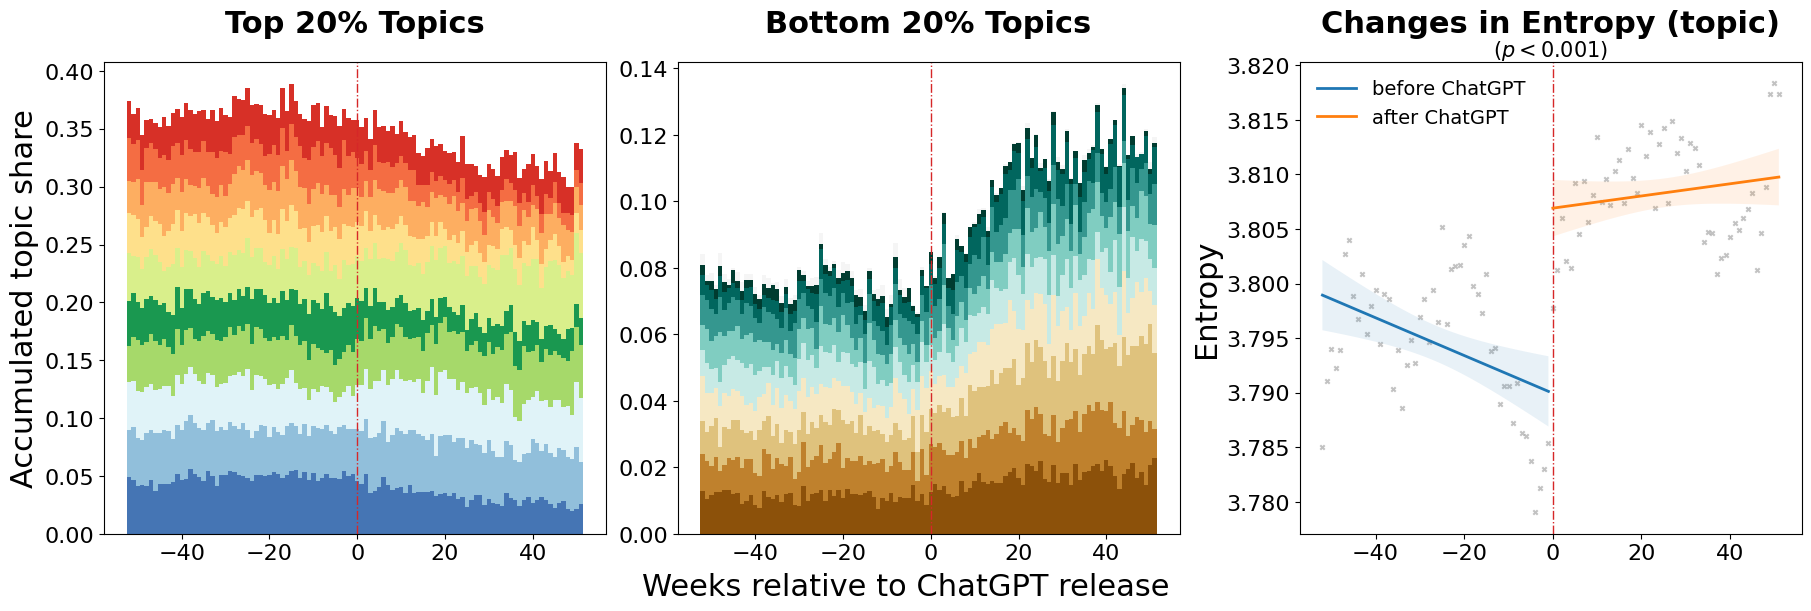

In [33]:

### create a figure with multiple subplots
sharey = True 
sharex = True 

fig, axs = plt.subplots(1, 3, figsize = (18, 6), constrained_layout=True)
colors = plt.get_cmap('tab20').colors 


for x, (title, proportion) in enumerate(proportion_dict.items()):
    rel_week = sorted(proportion['rel_week'].unique())
    topic_list = list(proportion['Topic'].unique())
    order_list = list_10[title]
    colors = color_list[x]

    bottom = np.zeros(len(rel_week))

    for idx, topic in enumerate(order_list):
        t_p = proportion[proportion['Topic'] == topic]

        count_full = np.zeros(len(rel_week))
        for i, rw in enumerate(t_p['rel_week']):
            if rw in rel_week:
                rw_idx = rel_week.index(rw)
                count_full[rw_idx] = t_p.loc[t_p['rel_week'] == rw, 'pct'].values[0]

        axs[x].bar(rel_week, count_full, bottom=bottom, label=topic, color=colors[idx], width=1.0, align='center')
        bottom += count_full 

    # 보조선 및 제목/레이블 등
    axs[x].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
    # axs[x].set_title(f'{title}', fontsize=25)

    axs[x].text(0.5, 1.05, f"{title}",
            ha='center', va='bottom', fontsize=22, fontweight='bold', transform=axs[x].transAxes)

    axs[x].text(0.5, 1.00, "",
        ha='center', va='bottom', fontsize=15, transform=axs[x].transAxes)  

    axs[x].tick_params(axis='x', labelsize=16)
    axs[x].tick_params(axis='y', labelsize=16)

idx = 2
list_ = gini_entropy_dict['Entropy']
x_rel, divider = get_dist_x_div(list_)

reg_bf = calc_regression_with_ci(x_rel[:divider], list_[:divider])
reg_af = calc_regression_with_ci(x_rel[divider:], list_[divider:])

reg_bf_summary = reg_bf["pred_summary"]
reg_af_summary = reg_af["pred_summary"]

# 회귀선 (예측값)
reg_bf_y_pred = reg_bf_summary["mean"]
reg_af_y_pred = reg_af_summary["mean"]
# 신뢰구간
reg_bf_ci_lower = reg_bf_summary["mean_ci_lower"]
reg_bf_ci_upper = reg_bf_summary["mean_ci_upper"]

reg_af_ci_lower = reg_af_summary["mean_ci_lower"]
reg_af_ci_upper = reg_af_summary["mean_ci_upper"]

p_value_txt = '($p < 0.001$)' if p_value_0 <0.001 else f'($p = {p_value_0:.3f}$)'

axs[idx].scatter(x_rel, list_, color = 'darkgray', alpha = 0.7,  s=10, marker='x')
axs[idx].axvline(x=0, color='tab:red', linestyle='-.', linewidth=1)
# axs[idx].set_ylabel(f"{measure} of Topic Distribution", fontsize = 10)
axs[idx].plot(x_rel[:divider], reg_bf_y_pred, linewidth=2, label = 'before ChatGPT')
axs[idx].plot(x_rel[divider:], reg_af_y_pred, linewidth=2, label = 'after ChatGPT')

axs[idx].fill_between(x_rel[:divider], reg_bf_ci_lower, reg_bf_ci_upper, alpha=0.1)
axs[idx].fill_between(x_rel[divider:], reg_af_ci_lower, reg_af_ci_upper, alpha=0.1)

axs[idx].legend(frameon=False, loc='best', fontsize=14)
axs[idx].tick_params(axis='x', labelsize=16)
axs[idx].tick_params(axis='y', labelsize=16)


axs[idx].text(0.5, 1.05, f"Changes in Entropy (topic)",
            ha='center', va='bottom', fontsize=22, fontweight='bold', transform=axs[idx].transAxes)

axs[idx].text(0.5, 1.00, f"{p_value_txt}",
        ha='center', va='bottom', fontsize=15, transform=axs[idx].transAxes)  
        

axs[0].set_ylabel("Accumulated topic share", fontsize = 22)
axs[2].set_ylabel(f"Entropy", fontsize = 22)

fig.supxlabel("Weeks relative to ChatGPT release", fontsize=22) 
plt.savefig(f"{CONSTANTS.output_dir}C_Result_Fig2_1.png", dpi=300, bbox_inches='tight')
plt.show();